In [1]:
import pandas as pd
import numpy as np

In [11]:
df1 = pd.read_csv('entrenar_st_1820.csv')
df2 = pd.read_csv('entrenar_st_1921.csv')
df3 = pd.read_csv('entrenar_st_2022.csv')
df4 = pd.read_csv('entrenar_st_2123.csv')
archivos = [df1,df2,df3,df4]

In [3]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [9]:
def buscar_parametros_xgboost_st(colsampleT,learnR,depthM,alfa,estimators):
    xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
            colsample_bytree = colsampleT, learning_rate = learnR,
            max_depth = depthM, alpha = alfa, n_estimators = estimators) 
    
    suma_errores = 0
    for df in archivos:
        X,y = df.drop(['ref_hash','segundos'],axis=1),df['segundos']
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=150)

        xg_reg.fit(X_train,y_train)
        preds = xg_reg.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        suma_errores += rmse
       
    error_promedio = suma_errores / len(archivos)
    print('RMSE promedio: %f' % (error_promedio))
    return (error_promedio)

In [12]:
colsampleT = 0.5
learnR = 0.1
depthM = 5
alfa = 10
estimators = 10
errores = []
for v in [0.5,0.7,0.9,1]:
    colsampleT = v
    print('Colsample_bytree: %f'% (v))
    error = buscar_parametros_xgboost_st(colsampleT,learnR,depthM,alfa,estimators)
    errores.append([error,v])
error,v = min(errores,key=lambda x: x[0])
print('Error minimo %f con valor %f' %(error,v))

Colsample_bytree: 0.500000
RMSE promedio: 100148.740004
Colsample_bytree: 0.700000
RMSE promedio: 99968.928405
Colsample_bytree: 0.900000
RMSE promedio: 99720.538544
Colsample_bytree: 1.000000
RMSE promedio: 99685.075814
Error minimo 99685.075814 con valor 1.000000


In [15]:
colsampleT = 1
learnR = 0.1
depthM = 5
alfa = 10
estimators = 10
errores = []
for v in [0.1,0.3,0.5,0.7,0.9,1.1]:
    learnR = v
    print('Learning_rate: %f'% (v))
    error = buscar_parametros_xgboost_st(colsampleT,learnR,depthM,alfa,estimators)
    errores.append([error,v])
error,v = min(errores,key=lambda x: x[0])
print('Error minimo %f con valor %f' %(error,v))

Learning_rate: 0.100000
RMSE promedio: 99685.075814
Learning_rate: 0.300000
RMSE promedio: 83880.348647
Learning_rate: 0.500000
RMSE promedio: 83747.933263
Learning_rate: 0.700000
RMSE promedio: 83847.378364
Learning_rate: 0.900000
RMSE promedio: 83924.984127
Learning_rate: 1.100000
RMSE promedio: 84081.706351
Error minimo 83747.933263 con valor 0.500000


In [16]:
colsampleT = 1
learnR = 0.5
depthM = 5
alfa = 10
estimators = 10
errores = []
for v in [2,5,8,12,15,20]:
    depthM = v
    print('Depth: %f'% (v))
    error = buscar_parametros_xgboost_st(colsampleT,learnR,depthM,alfa,estimators)
    errores.append([error,v])
error,v = min(errores,key=lambda x: x[0])
print('Error minimo %f con valor %f' %(error,v))

Depth: 2.000000
RMSE promedio: 85534.715617
Depth: 5.000000
RMSE promedio: 83747.933263
Depth: 8.000000
RMSE promedio: 83793.726774
Depth: 12.000000
RMSE promedio: 84950.995488
Depth: 15.000000
RMSE promedio: 86562.758890
Depth: 20.000000
RMSE promedio: 89441.275765
Error minimo 83747.933263 con valor 5.000000


In [18]:
colsampleT = 1
learnR = 0.5
depthM = 5
alfa = 10
estimators = 10
errores = []
for v in [8,10,12]:
    alfa = v
    print('Alpha: %f'% (v))
    error = buscar_parametros_xgboost_st(colsampleT,learnR,depthM,alfa,estimators)
    errores.append([error,v])
error,v = min(errores,key=lambda x: x[0])
print('Error minimo %f con valor %f' %(error,v))

Alpha: 8.000000
RMSE promedio: 83747.933263
Alpha: 10.000000
RMSE promedio: 83747.933263
Alpha: 12.000000
RMSE promedio: 83747.933263
Error minimo 83747.933263 con valor 8.000000


In [21]:
colsampleT = 1
learnR = 0.5
depthM = 5
alfa = 10
estimators = 10
errores = []
for v in [10,20,30,40,50]:
    estimators = v
    print('Estimators: %f'% (v))
    error = buscar_parametros_xgboost_st(colsampleT,learnR,depthM,alfa,estimators)
    errores.append([error,v])
error,v = min(errores,key=lambda x: x[0])
print('Error minimo %f con valor %f' %(error,v))

Estimators: 10.000000
RMSE promedio: 83747.933263
Estimators: 20.000000
RMSE promedio: 83706.038511
Estimators: 30.000000
RMSE promedio: 83691.435737
Estimators: 40.000000
RMSE promedio: 83703.665094
Estimators: 50.000000
RMSE promedio: 83722.044262
Error minimo 83691.435737 con valor 30.000000


## Importancia de features

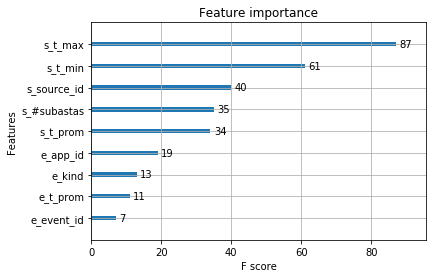

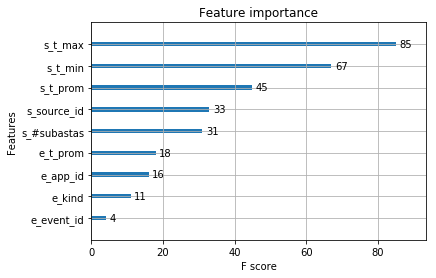

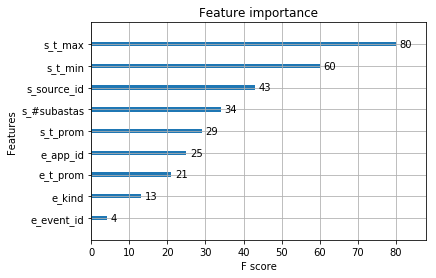

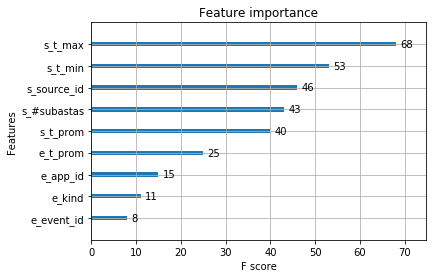

In [7]:
for df in archivos:
    X,y = df.drop(['ref_hash','segundos'],axis=1),df['segundos']
    data_dmatrix = xgb.DMatrix(data=X,label=y)
    params = {"objective":"reg:linear",'colsample_bytree': 1,
              'learning_rate': 0.5, 'max_depth': 5, 'alpha': 10}
    xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
    xgb.plot_importance(xg_reg)

In [12]:
nuevos_archivos = []
for df in archivos:
    #df = df.drop(['e_#atribuidos','e_#eventos','e_#wifi',
    #              's_ref_type1','s_ref_type_7'],axis=1)
    df['s_t_prom#'] = df['s_t_prom']*df['s_#subastas']
    print(df.head(2))
    nuevos_archivos.append(df)
archivos = nuevos_archivos

          ref_hash  s_source_id  s_ref_type1   s_t_min       s_t_prom  \
0   41863526108385     0.122122          1.0  157228.0  185636.171429   
1  135153013040192     0.508547          1.0  187854.0  188381.875000   

    s_t_max  s_ref_type_7  s_#subastas   e_kind  e_app_id  e_event_id  \
0  189019.0           0.0         35.0  0.12664  0.211054    0.126202   
1  188652.0           0.0          8.0  0.00000  0.000000    0.000000   

   e_#wifi  e_#atribuidos  e_#eventos       e_t_prom  segundos     s_t_prom#  
0      0.0            0.0        88.0  140062.647727  259200.0  6.497266e+06  
1      0.0            0.0         0.0  259200.000000  259200.0  1.507055e+06  
          ref_hash  s_source_id  s_ref_type1   s_t_min       s_t_prom  \
0   41863526108385     0.122257          1.0   70828.0   99236.171429   
1  135153013040192     0.507354          1.0  101454.0  101981.875000   

    s_t_max  s_ref_type_7  s_#subastas    e_kind  e_app_id  e_event_id  \
0  102619.0           0.0    

In [19]:
archivos[1].head()

,ref_hash,s_source_id,s_t_min,s_t_prom,s_t_max,s_#subastas,e_kind,e_app_id,e_event_id,e_t_prom,segundos,s_source_t_max
0,41863526108385,0.122257,70828.0,99236.171429,102619.0,35.0,0.147983,0.261183,0.147484,88923.736111,259200.0,12545.859901
1,135153013040192,0.507354,101454.0,101981.875000,102252.0,8.0,0.000000,0.000000,0.000000,259200.000000,259200.0,51877.948969
2,181891380775191,0.507354,170365.0,170365.000000,170365.0,1.0,0.000000,0.000000,0.000000,259200.000000,259200.0,86435.343817
3,186034136943920,0.507354,98271.0,174949.062500,257356.0,16.0,0.000000,0.000000,0.000000,259200.000000,17475.0,130570.565219
4,295841792051458,0.507354,173232.0,173232.000000,173232.0,1.0,0.000000,0.000000,0.000000,259200.000000,259200.0,87889.927392


In [13]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
        colsample_bytree = 1, learning_rate = 0.5,
        max_depth = 5, gamma = 10, n_estimators = 30) 
    
suma_errores = 0
for df in archivos:
    X,y = df.drop(['ref_hash','segundos'],axis=1),df['segundos']
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=150)

    xg_reg.fit(X_train,y_train)
    preds = xg_reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    suma_errores += rmse
       
error_promedio = suma_errores / len(archivos)
print('RMSE promedio: %f' % (error_promedio))

RMSE promedio: 83711.848368


In [4]:
predecir = pd.read_csv('predecir_st_2426.csv')
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
            colsample_bytree = 1, learning_rate = 0.5,
            max_depth = 5, alpha = 10, n_estimators = 30) 
    
for df in archivos:
    X,y = df.drop(['ref_hash','segundos'],axis=1),df['segundos']
    xg_reg.fit(X,y)
preds = xg_reg.predict(predecir.drop(['ref_hash','segundos'],axis=1))
prediccion = pd.DataFrame(preds)
prediccion.columns = ['objetivo']
prediccion.head()

/home/cecilia/.local/lib/python2.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/cecilia/.local/lib/python2.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


,objetivo
0,175154.921875
1,154015.718750
2,25057.111328
3,143997.171875
4,93046.671875


In [5]:
print(predecir.shape)
print(prediccion.shape)

(438282, 16)
(438282, 1)


In [6]:
prediccion = pd.DataFrame({'ref_hash': predecir['ref_hash'],
                           'obj': prediccion['objetivo']})
prediccion.to_csv('prediccion_st_2426.csv', index=False)
prediccion.head()

,obj,ref_hash
0,175154.921875,69039685746313
1,154015.718750,345999128501141
2,25057.111328,360710529886978
3,143997.171875,365882020742330
4,93046.671875,416301579449694
